In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-dieases-uci/heart.csv


# Loading Datset: Heart Disease UCI

In [2]:
df = pd.read_csv("../input/heart-dieases-uci/heart.csv")
#DF.HEAD(0)
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0


In [3]:
print("" + str(len(df.columns)) + " columns found!")
columns = list(df.columns)
print(columns)      

14 columns found!
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
FEATURES = columns[0:len(columns)-1]
print("FEATURES: " + str(FEATURES))

FEATURES: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [5]:
TOTAL_ROWS = len(df)
print("Total rows: " + str(TOTAL_ROWS))

Total rows: 303


# Visualize the data:

<AxesSubplot:ylabel='Frequency'>

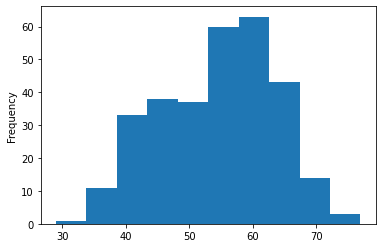

In [6]:
df["age"].plot(kind="hist")

# Train-test split:

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [8]:
print("Training data: " + str(len(df_train)))
print("Testing data: " + str(len(df_test)))

Training data: 242
Testing data: 61


# Load the train data

In [9]:
x_train = df_train[FEATURES]
y_train = df_train['target']

In [10]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2


In [11]:
y_train.head()

130    1
124    1
128    1
14     1
58     1
Name: target, dtype: int64

# Load test data

In [12]:
x_test = df_test[FEATURES]
y_test = df_test['target']

# Instantiate Decision Tree model

In [13]:
dtc = tree.DecisionTreeClassifier()

# Train/Fit

In [14]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

# Predict for test bills

In [15]:
heart_disease_pred = dtc.predict(x_test)
print(list(heart_disease_pred))

[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Crosscheck with actual test data:

In [16]:
#Accuracy:
print('Accuracy score: ' + str(accuracy_score(y_test,heart_disease_pred)))

Accuracy score: 0.819672131147541


In [17]:
#Actual
print(list(y_test))

[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
